---
## Step 0: Load & Setup The Data

In [2]:
# general python packages
from __future__ import print_function
import os 
import numpy as np
import pandas as pd
import random as ran
import matplotlib.pyplot as plt

# Deep Learning packages
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv3D, MaxPooling3D, Input, ZeroPadding3D
from keras.layers.normalization import BatchNormalization
from keras import initializers
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, Adamax, Nadam, SGD # using Adam in this model, but just showing the other options here for future reference
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Using TensorFlow backend.


In [3]:
%matplotlib inline

In [4]:
# neuroimaging-specific python packages
import nilearn
from nilearn import plotting
import nibabel as nib

/home/slab/environments/OHBM_DL/lib/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# Connect to Google Drive where data is stored
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/OHBM_DL_data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
s3://fcp-indi/dects/HBN/Outputs/mindboggle_swf/mindboggle/ants_subjects/

In [0]:
cd /content/gdrive/My\ Drive/OHBM_DL_data/

In [5]:
# Read in csv file with subject info
pheno = pd.read_csv('/net/parasite/CMI/OHBM_DL_data/pheno_file.csv')

In [6]:
pheno['Age'].describe()

count    906.000000
mean      10.824074
std        3.558937
min        5.036048
25%        8.039898
50%       10.031599
75%       13.057266
max       21.816563
Name: Age, dtype: float64

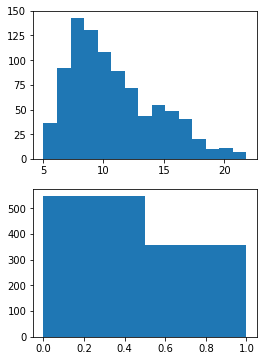

In [14]:
fig = plt.figure(figsize=(4,6))

plt.subplot(2,1,1)
plt.hist(pheno['Age'],bins=15)

plt.subplot(2,1,2)
plt.hist(pheno['Sex'],bins=2)

plt.show()

In [15]:
# Create numpy array of age labels for all subjects
age_all = pheno['Age'].to_numpy()

In [17]:
cd /net/parasite/CMI/OHBM_DL_data/tissue_masks/

/net/parasite/CMI/OHBM_DL_data/tissue_masks


In [18]:
ls

sub-NDARAA075AMK_CSFprobmask.nii*  sub-NDARME100GK1_CSFprobmask.nii*
sub-NDARAA075AMK_GMprobmask.nii*   sub-NDARME100GK1_GMprobmask.nii*
sub-NDARAA075AMK_WMprobmask.nii*   sub-NDARME100GK1_WMprobmask.nii*
sub-NDARAA536PTU_CSFprobmask.nii*  sub-NDARME656MTN_CSFprobmask.nii*
sub-NDARAA536PTU_GMprobmask.nii*   sub-NDARME656MTN_GMprobmask.nii*
sub-NDARAA536PTU_WMprobmask.nii*   sub-NDARME656MTN_WMprobmask.nii*
sub-NDARAA948VFH_CSFprobmask.nii*  sub-NDARME736MN8_CSFprobmask.nii*
sub-NDARAA948VFH_GMprobmask.nii*   sub-NDARME736MN8_GMprobmask.nii*
sub-NDARAA948VFH_WMprobmask.nii*   sub-NDARME736MN8_WMprobmask.nii*
sub-NDARAC349YUC_CSFprobmask.nii*  sub-NDARME930DE7_CSFprobmask.nii*
sub-NDARAC349YUC_GMprobmask.nii*   sub-NDARME930DE7_GMprobmask.nii*
sub-NDARAC349YUC_WMprobmask.nii*   sub-NDARME930DE7_WMprobmask.nii*
sub-NDARAC350BZ0_CSFprobmask.nii*  sub-NDARMF508PA2_CSFprobmask.nii*
sub-NDARAC350BZ0_GMprobmask.nii*   sub-NDARMF508PA2_GMprobmask.nii*
sub-NDARAC350BZ0_WMprobmask.nii*   sub-NDAR

sub-NDARHR372GJ7_WMprobmask.nii*   sub-NDARVX292KKC_WMprobmask.nii*
sub-NDARHR753ZKU_CSFprobmask.nii*  sub-NDARVX547MA0_CSFprobmask.nii*
sub-NDARHR753ZKU_GMprobmask.nii*   sub-NDARVX547MA0_GMprobmask.nii*
sub-NDARHR753ZKU_WMprobmask.nii*   sub-NDARVX547MA0_WMprobmask.nii*
sub-NDARHR944BBY_CSFprobmask.nii*  sub-NDARVY007TEJ_CSFprobmask.nii*
sub-NDARHR944BBY_GMprobmask.nii*   sub-NDARVY007TEJ_GMprobmask.nii*
sub-NDARHR944BBY_WMprobmask.nii*   sub-NDARVY007TEJ_WMprobmask.nii*
sub-NDARHT095YB4_CSFprobmask.nii*  sub-NDARVY366HWJ_CSFprobmask.nii*
sub-NDARHT095YB4_GMprobmask.nii*   sub-NDARVY366HWJ_GMprobmask.nii*
sub-NDARHT095YB4_WMprobmask.nii*   sub-NDARVY366HWJ_WMprobmask.nii*
sub-NDARHT218GFA_CSFprobmask.nii*  sub-NDARVY938WR6_CSFprobmask.nii*
sub-NDARHT218GFA_GMprobmask.nii*   sub-NDARVY938WR6_GMprobmask.nii*
sub-NDARHT218GFA_WMprobmask.nii*   sub-NDARVY938WR6_WMprobmask.nii*
sub-NDARHU896TWV_CSFprobmask.nii   sub-NDARWA351ZE2_CSFprobmask.nii*
sub-NDARHU896TWV_GMprobmask.nii*   sub-NDAR

In [29]:
#load .nii, view dim, view images, crop
image = nilearn.image.load_img('*_GMprobmask.nii')

In [36]:
#image.dataobj[0]

In [39]:
plotting.plot_anat(image[0].getdata)

TypeError: Cannot slice image objects; consider using `img.slicer[slice]` to generate a sliced image (see documentation for caveats) or slicing image array data with `img.dataobj[slice]` or `img.get_data()[slice]`

In [23]:
crop_image = nilearn.image.crop_img(image[0], rtol=1e-08, copy=True)

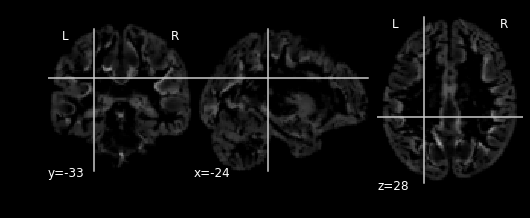

In [24]:
plotting.plot_anat(crop_image)

In [25]:
#convert image data to numpy arrays
image_npy = crop_image.get_data()

In [28]:
image_npy.shape

(96, 121, 104)

In [0]:
# Divide data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(images_npy, age_all, test_size=0.2, random_state=42)

In [0]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]
n_classes = np.unique(y_train).size

In [0]:
print("Number of training examples =", n_train)
print ("Number of test examples", n_test)
print("Image data shape =", image_shape)

In [0]:
X_train, y_train = shuffle(X_train, y_train)

In [0]:
X_test, y_test = shuffle(X_test, y_test)

In [0]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_CMI_T1w_age_5-1-19'

# Step 1: Model Construction

In [0]:
model = Sequential() # The simplest model, a linear stack of layers

model.add(Conv3D(filters=64,
                 kernel_size=(3,3,3), #determines the width, height, depth of the 3D convolution window
                 activation='elu', #Exponential Linear Unit
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform', 
                 input_shape=image_shape)) # only the first layer needs to be told this info
model.add(Conv3D(filters=64, kernel_size=(3,3,3), activation='elu', strides=(1,1,1), padding='same'))
model.add(Conv3D(filters=64, kernel_size=(3,3,3), activation='elu', strides=(1,1,1), padding='same'))
model.add(MaxPooling3D((2,2,2),strides=(2,2,2))) # pooling is also referred to as a downsampling layer
model.add(BatchNormalization()) # Normalize the activations of the previous layer at each batch (aka make the mean activation close to 0 and the activation standard deviation close to 1)

model.add(Conv3D(filters=32, kernel_size=(3,3,3), activation='elu', strides=(1,1,1), padding='same'))
model.add(Conv3D(filters=32, kernel_size=(3,3,3), activation='elu', strides=(1,1,1), padding='same'))
model.add(MaxPooling3D((2,2,2),strides=(2,2,2)))
model.add(BatchNormalization())

model.add(Conv3D(filters=16, kernel_size=(3,3,3), activation='elu', strides=(1,1,1), padding='same'))
model.add(Conv3D(filters=16, kernel_size=(3,3,3), activation='elu', strides=(1,1,1), padding='same'))
model.add(MaxPooling3D((2,2,2),strides=(2,2,2)))
model.add(BatchNormalization())

model.add(Conv3D(filters=8, kernel_size=(3,3,3), activation='elu', strides=(1,1,1), padding='same'))
model.add(Conv3D(filters=8, kernel_size=(3,3,3), activation='elu', strides=(1,1,1), padding='same'))
model.add(MaxPooling3D((2,2,2),strides=(2,2,2)))
model.add(BatchNormalization())

model.add(AveragePooling3D((2,2,2),strides=(2,2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu',name='features')) #convert the output of the convolutional part of the CNN into a 1D feature vector. Length of vector = n_classes
model.add(Dense(1) # final output is a single number (Age in this model)
model.summary()

filename="best_weights.h5"
filename2="weights.{epoch:02d}-{val_loss:.2f}.hdf5"


In [0]:
checkpoints = []

if not os.path.exists('Results00/'):
    os.makedirs('Results00/')

checkpoints.append(ModelCheckpoint('Results00/'+filename, 
                                   monitor='val_acc', 
                                   verbose=1, 
                                   save_best_only=True, 
                                   save_weights_only=True, 
                                   mode='auto', 
                                   period=1))

checkpoints.append(ModelCheckpoint('Results00/'+filename2, 
                                   monitor='val_acc', 
                                   verbose=1, 
                                   save_best_only=False, 
                                   save_weights_only=True, 
                                   mode='auto', 
                                   period=20))

checkpoints.append(TensorBoard(log_dir='Results00/TensorBoardLogs', 
                               histogram_freq=0, 
                               write_graph=True, 
                               write_images=False, 
                               embeddings_freq=0, 
                               embeddings_layer_names=['features'], 
                               embeddings_metadata='metadata.tsv'))

checkpoints.append(keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', min_delta=0, patience=10))
checkpoints.append(keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0))
checkpoints.append(CSVLogger('Results00/log.csv'))

In [0]:
model.compile(loss='mean_square_error', # the objective that the model will try to minimize
              optimizer='adam', 
              metrics=['mae', 'acc']) # add in any other metrics you want to use to show performance of the model

**Saving/loading whole models (architecture + weights + optimizer state):**
1. the architecture of the model, allowing to re-create the model
2. the weights of the model
3. the training configuration (loss, optimizer)
4. the state of the optimizer, allowing to resume training exactly where you left off


# Step 2: Model Training

In [0]:
NUM_EPOCHS = 50 # defines for how many times the training will repeat. 1 epoch is 1 forward pass and 1 backward pass over all the training examples
BATCH_SIZE=12 # the number of training examples in one forward/backward pass (or for 1 epoch)
history1= model.fit(X_train, y_train, 
          validation_split=0.1,
          batch_size= BATCH_SIZE, 
          epochs = NUM_EPOCHS,
          callbacks=checkpoints)

In [0]:
log_dir ='Results00/'
from os.path import exists, join
with open(join(log_dir, 'metadata.tsv'), 'w') as f:
    np.savetxt(f, y_test)

# Step 3: Model Testing

In [0]:
model.evaluate(x=x_test, y=y_test, callbacks=None)

# Step 4: Model Evaluation

In [0]:
model.predict_on_batch(x)

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()